In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


### Reading the dataset

In [45]:
train_data = pd.read_csv(r'D:\Devi\TCS\MobileDataSets\MobileDataSets\MobileTrain.csv')
dataset = train_data.copy(deep=True)

In [3]:
pd.set_option('display.max_columns',None)
train_data.head()


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [4]:
pd.set_option('display.max_columns',None)
train_data.tail()


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3

Data loaded successfully.

### EDA

In [ ]:
# Checking the basic details pf the dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [7]:
train_data.shape

(2000, 21)

In [8]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#### Visualisation

In [16]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

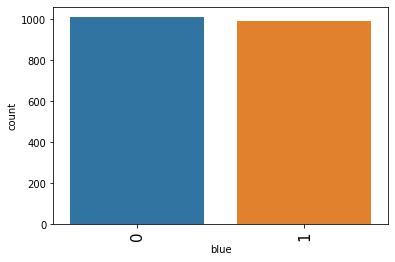

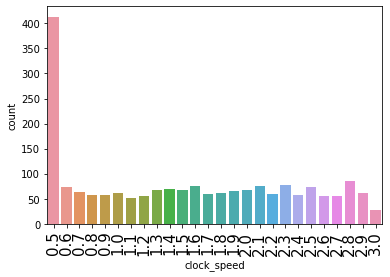

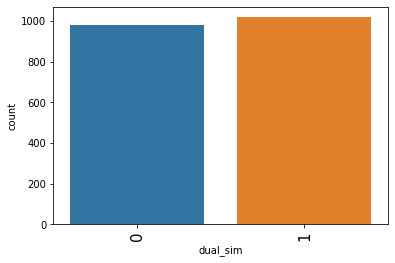

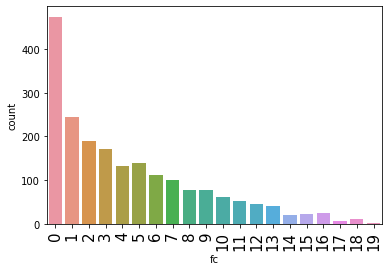

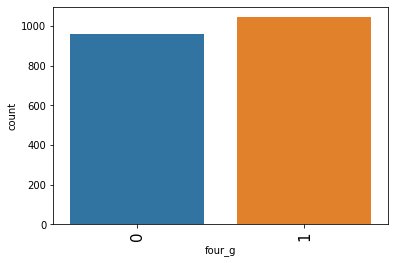

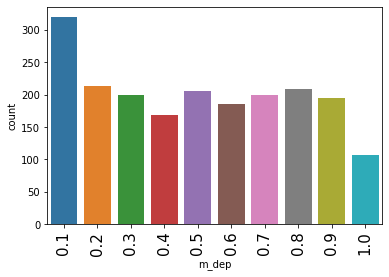

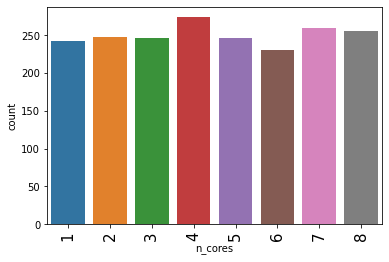

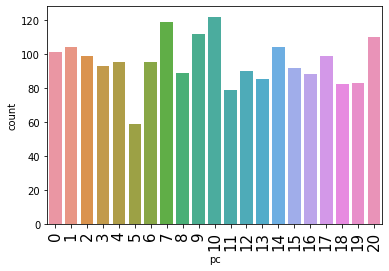

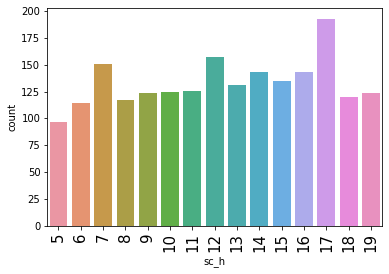

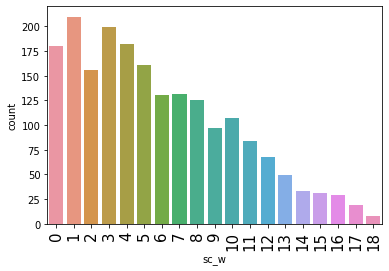

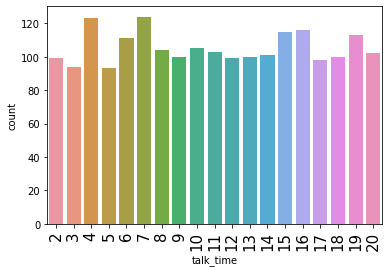

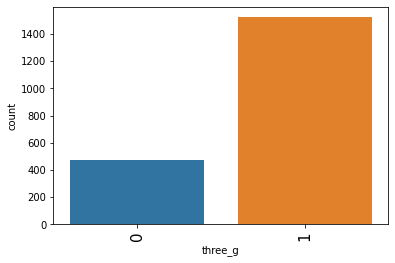

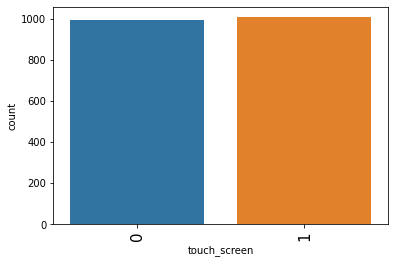

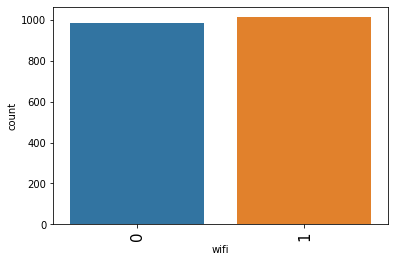

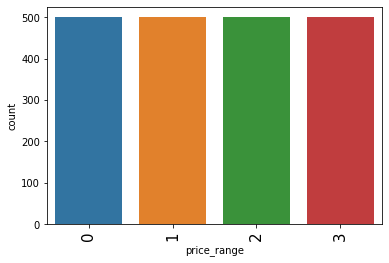

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [10]:
# count plot on various features
for i in train_data:
    if(train_data[i].nunique()<30):
        sns.countplot(x=train_data[i])
        plt.xticks(fontsize=15,rotation=90)
    plt.show()
plt.tight_layout


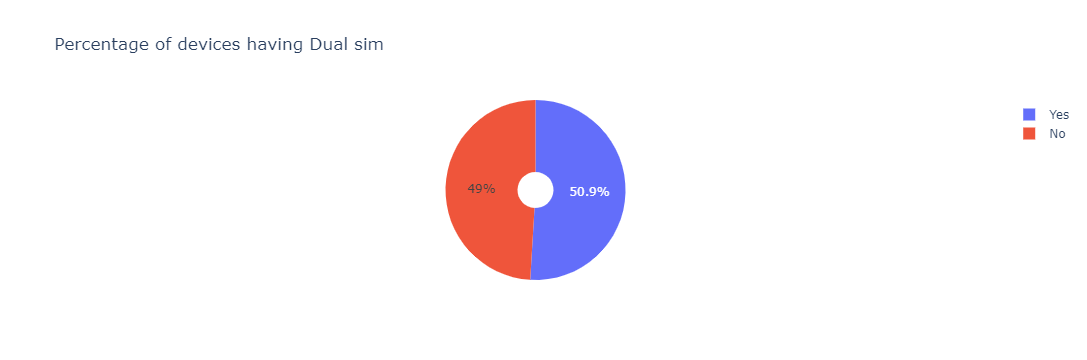

In [11]:
# Pie chart

train_data['isDualSim'] = ''
for i in range(len(train_data)):
    if train_data['dual_sim'][i] == 0:
        train_data['isDualSim'][i] = 'No'
    else:
         train_data['isDualSim'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isDualSim',title='Percentage of devices having Dual sim', hole = 0.2)

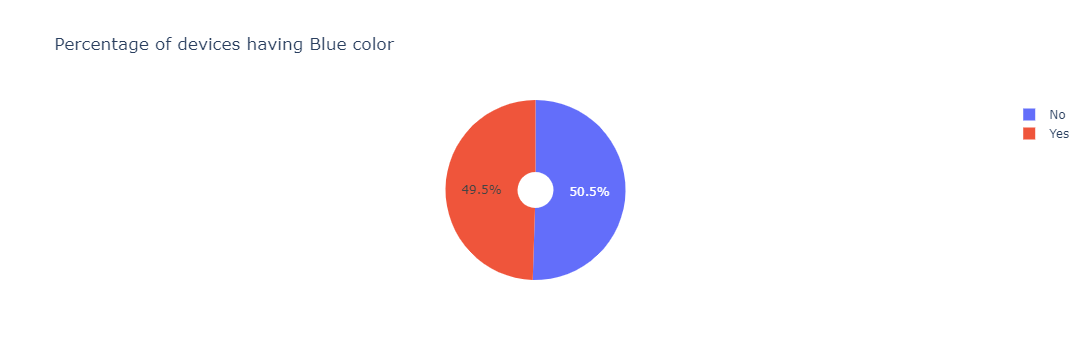

In [12]:
train_data['isBlue'] = ''
for i in range(len(train_data)):
    if train_data['blue'][i] == 0:
        train_data['isBlue'][i] = 'No'
    else:
         train_data['isBlue'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isBlue',title='Percentage of devices having Blue color', hole = 0.2)

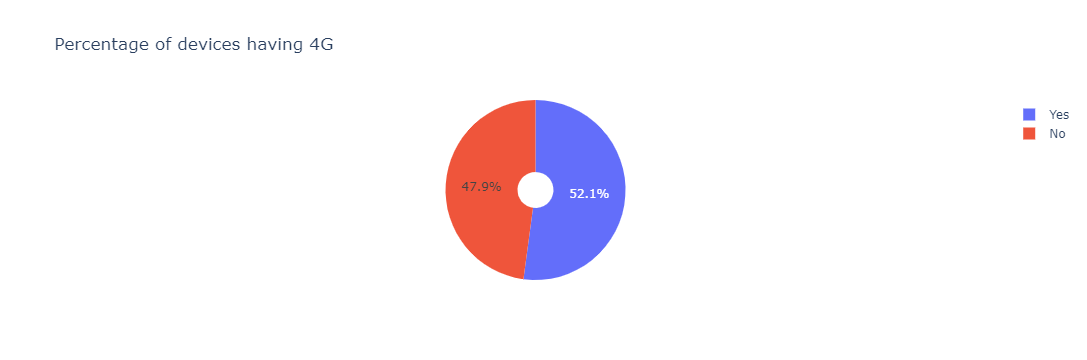

In [13]:
train_data['isFour_G'] = ''
for i in range(len(train_data)):
    if train_data['four_g'][i] == 0:
        train_data['isFour_G'][i] = 'No'
    else:
         train_data['isFour_G'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isFour_G',title='Percentage of devices having 4G', hole = 0.2)

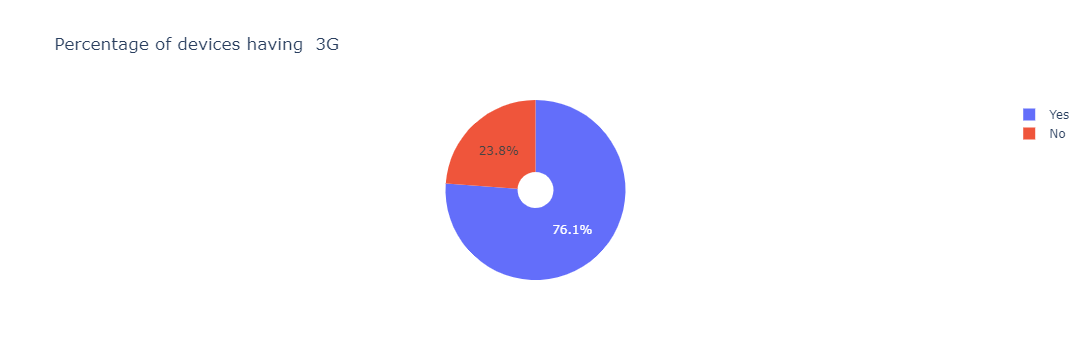

In [14]:
train_data['isThree_G'] = ''
for i in range(len(train_data)):
    if train_data['three_g'][i] == 0:
        train_data['isThree_G'][i] = 'No'
    else:
         train_data['isThree_G'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isThree_G',title='Percentage of devices having  3G', hole = 0.2)

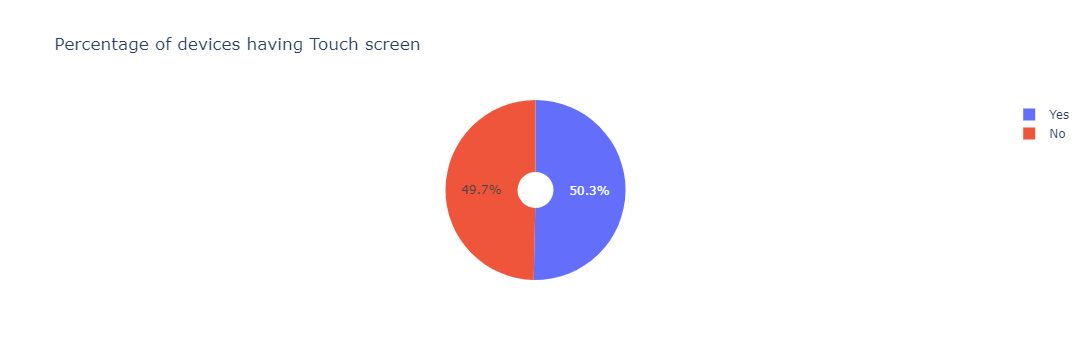

In [15]:
train_data['isTouch'] = ''
for i in range(len(train_data)):
    if train_data['touch_screen'][i] == 0:
        train_data['isTouch'][i] = 'No'
    else:
         train_data['isTouch'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isTouch',title='Percentage of devices having Touch screen', hole = 0.2)

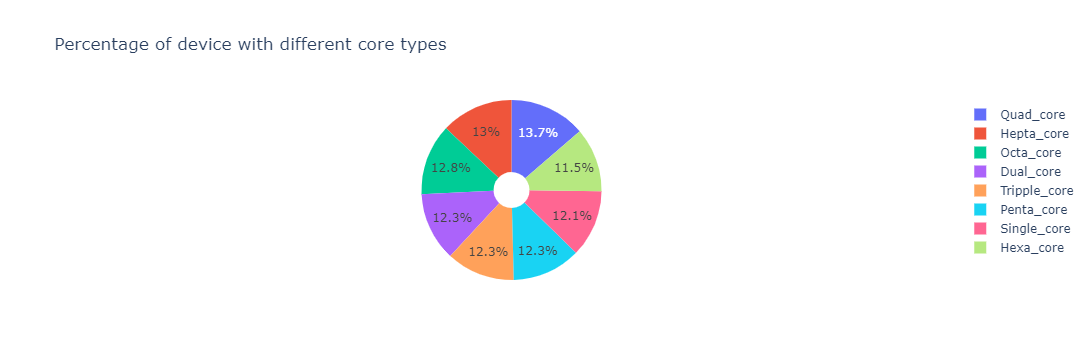

In [16]:
train_data['cores'] = ''
for i in range(len(train_data)):
    if train_data['n_cores'][i] == 1:
        train_data['cores'][i] = 'Single_core'
    elif train_data['n_cores'][i] == 2:
         train_data['cores'][i] = 'Dual_core'
    elif train_data['n_cores'][i] == 3:
         train_data['cores'][i] = 'Tripple_core'
    elif train_data['n_cores'][i] == 4:
         train_data['cores'][i] = 'Quad_core'
    elif train_data['n_cores'][i] == 5:
         train_data['cores'][i] = 'Penta_core'
    elif train_data['n_cores'][i] == 6:
         train_data['cores'][i] = 'Hexa_core' 
    elif train_data['n_cores'][i] == 7:
         train_data['cores'][i] = 'Hepta_core'
    else:
         train_data['cores'][i] = 'Octa_core'
px.pie(data_frame=train_data,names = 'cores',title='Percentage of device with different core types', hole = 0.2)

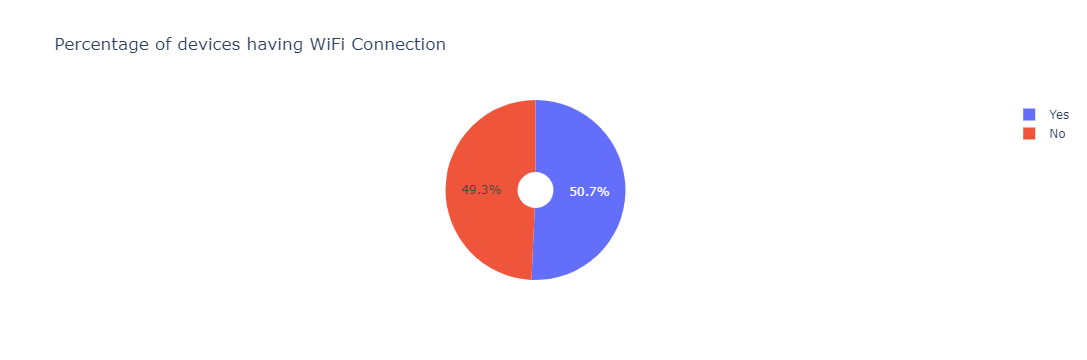

In [17]:
train_data['isWifi'] = ''
for i in range(len(train_data)):
    if train_data['wifi'][i] == 0:
        train_data['isWifi'][i] = 'No'
    else:
         train_data['isWifi'][i] = 'Yes'
px.pie(data_frame=train_data,names = 'isWifi',title='Percentage of devices having WiFi Connection', hole = 0.2)

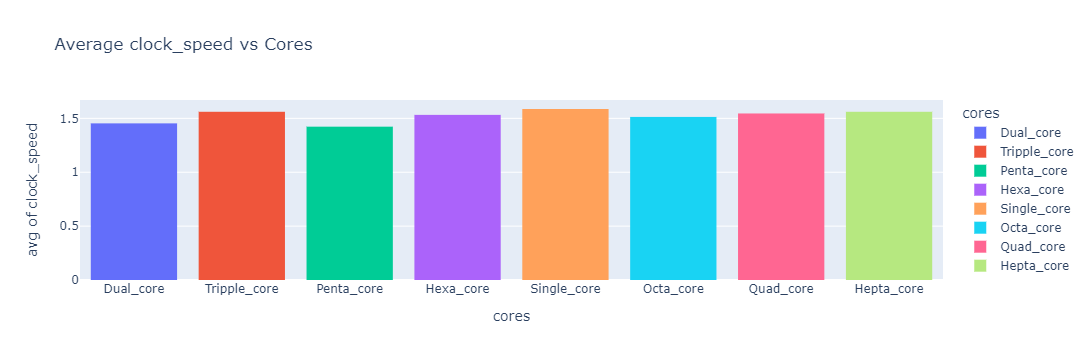

In [18]:
# px.histogram(train_data,x='clock_speed',color='n_cores',title="Clockspeed vs Processor")


fig = px.histogram(train_data, x="cores", y="clock_speed", histfunc='avg',color='cores',title="Average clock_speed vs Cores")
fig.show()

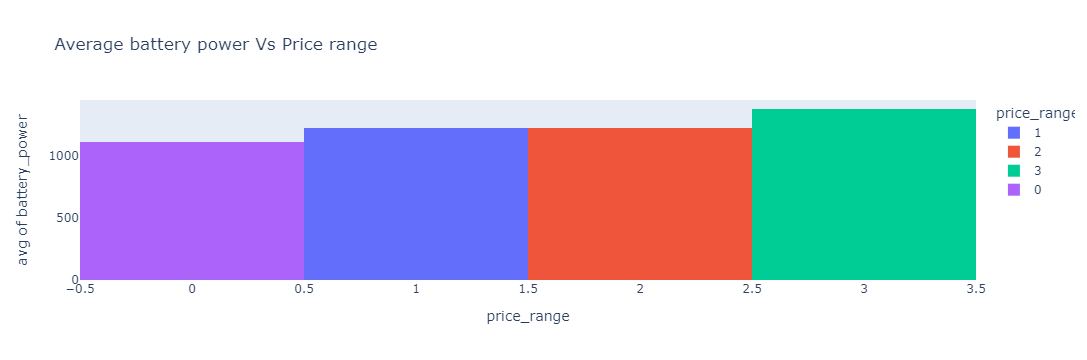

In [19]:

fig = px.histogram(train_data, x="price_range", y="battery_power", histfunc='avg',title="Average battery power Vs Price range",color="price_range")
fig.show()

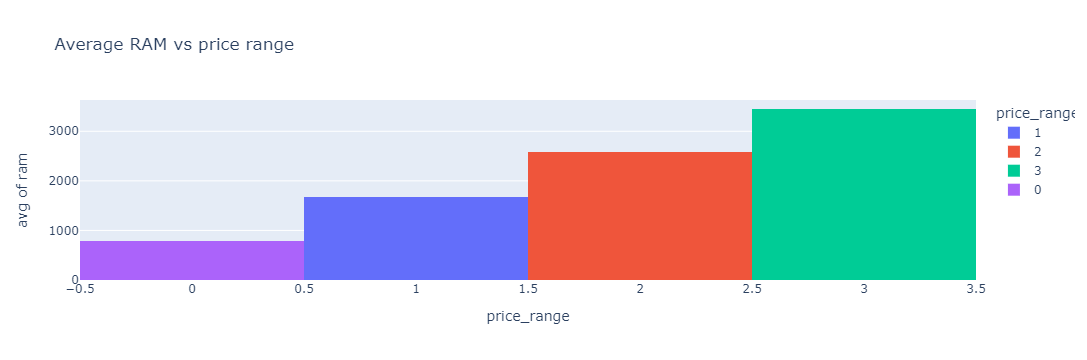

In [20]:
fig = px.histogram(train_data, x="price_range", y="ram", histfunc='avg',title="Average RAM vs price range",color="price_range")
fig.show()

From all these graphs we can conclude that almost 50% of the smartphones having wiFi connection,3G/4G connection, Touch screen and dual sim feature. these are the most basic features of a smart phone now a days. For a good smart phone there should be an average clock speed of 1.5Gz minimum. As battery power and RAM increases the price range also increases.  

Text(0.5, 1.0, 'Mobile size Vs Price range')

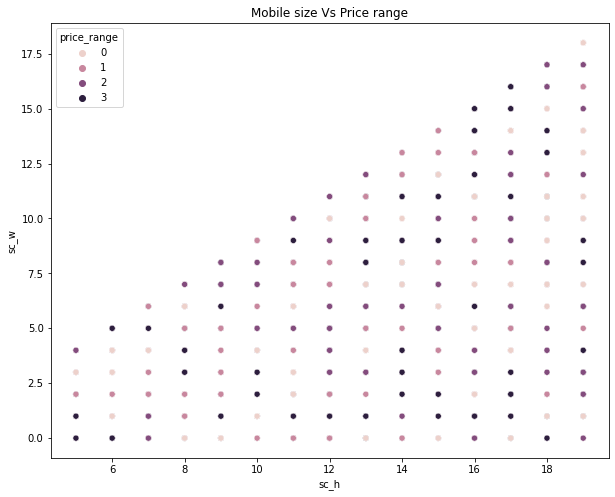

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['sc_h'],train_data['sc_w'],hue=train_data['price_range'])
plt.title("Mobile size Vs Price range")

Text(0.5, 1.0, 'Pixel size Vs Price range')

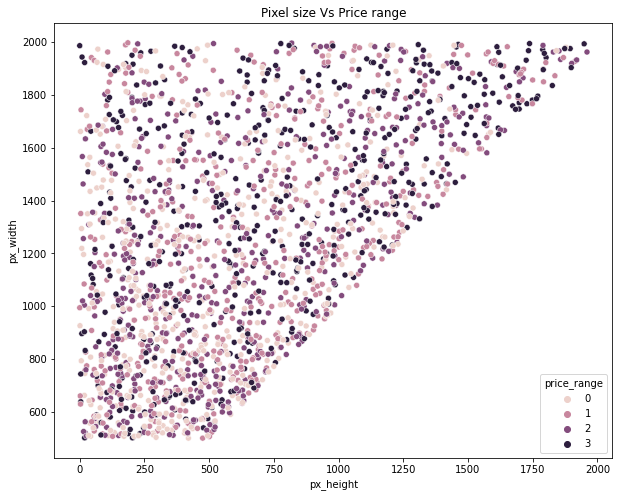

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['px_height'],train_data['px_width'],hue = train_data['price_range'])
plt.title("Pixel size Vs Price range")

For a smart phone, the pixel size refers to the screen resolution. According to our data the pixel size is not affecting the price range. The price range is mixed up for all the dimensions. 
The size of the phone as well, not that much correlated with the price range.

Text(0.5, 1.0, 'clockSpeed Vs Price range')

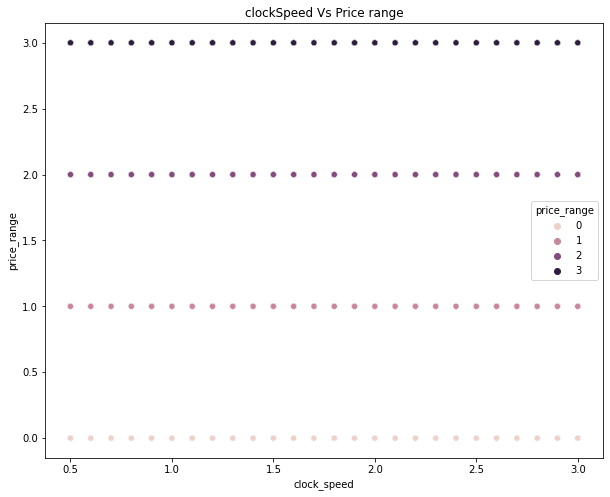

In [49]:
plt.figure(figsize=(10,8))
sns.scatterplot(train_data['clock_speed'],train_data['price_range'],hue = train_data['price_range'])
plt.title("clockSpeed Vs Price range")

The clock speed determines how many instructions the processor can execute per second.The clock speed of the phone dirdctly affects the price range, as clock speed increases the price range also increases.

<AxesSubplot:>

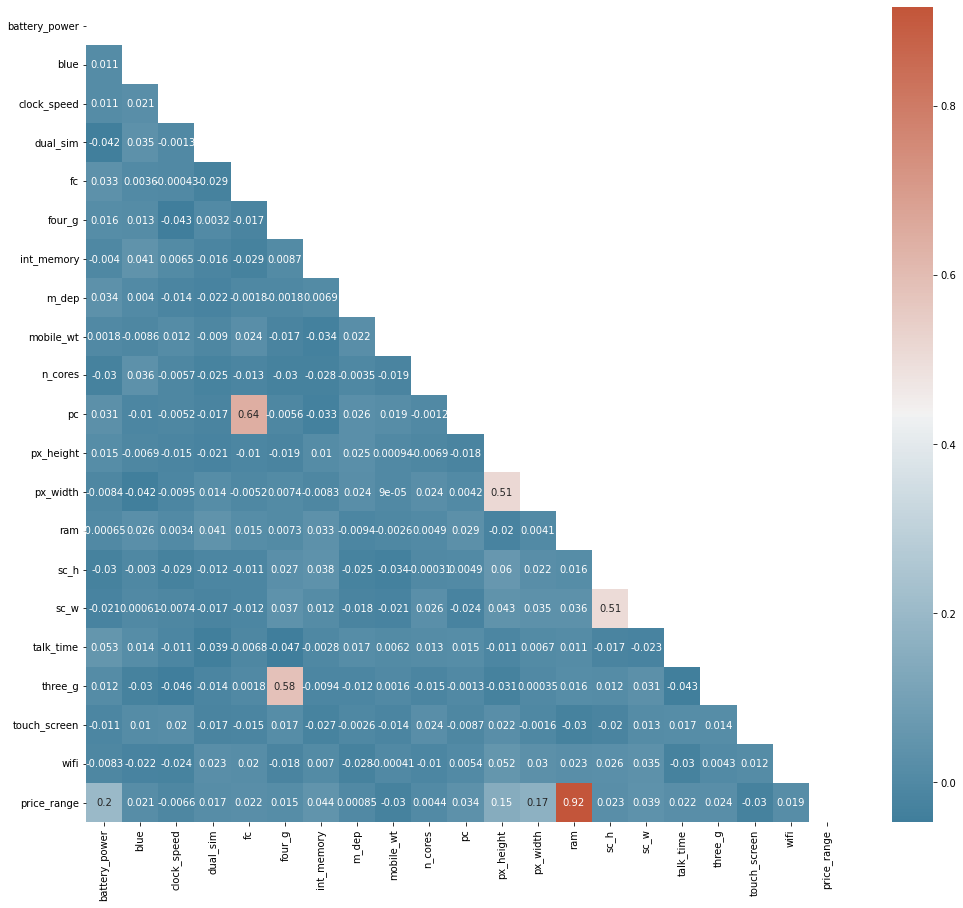

In [64]:
# correlation between different variables
corr = dataset.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(17, 15))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True,mask=mask,cmap=cmap)

The graph shows the correlation between the features. From the graph it is clear that the RAM and price range are highly correlated to each other